Introducción
—————————————————————————————————————————
En este laboratorio, nos enfocaremos en un conjunto de datos repleto de atributos clave de
distintas canciones. La meta es establecer a través de herramientas de aprendizaje
automático, un clasificador que pueda predecir las inclinaciones musicales de un individuo y
predecir si disfrutará o no de una determinada canción.
Conjunto de datos
—————————————————————————————————————————
Se proporcionará un archivo en formato CSV que alberga un conjunto de datos con 16
columnas. De estas, 13 representan atributos específicos de las canciones. Además, se
incluyen columnas dedicadas al nombre de la canción y al artista respectivamente. La
columna "destino" actúa como etiqueta, indicando las preferencias del usuario: un valor de
"1" significa que la canción fue del agrado del usuario, mientras que un "0" indica lo
contrario. Los atributos que caracterizan cada pista son:
1. Danceability (Bailabilidad): Describe cuán adecuada es una pista para bailar basada en
una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo y la
fuerza del ritmo. Una puntuación de 0.0 es menos bailable y 1.0 es más bailable.
2. Energy (Energía): Representa una medida perceptiva de intensidad y actividad. Las
pistas con mucha energía suelen sentirse rápidas, ruidosas y rítmicas. Por ejemplo, el death
metal tiene alta energía, mientras que un preludio de Bach tiene una puntuación baja en el
espectro de energía.
3. Loudness (Volumen): Es una medida general de la sonoridad de una pista en decibeles
(dB). Las pistas sonoras tienen un valor promedio más alto.
4. Speechiness (Hablado): Detecta la presencia de palabras habladas en una pista. Los
valores más cercanos a 1.0 sugieren que la pista contiene más palabras habladas, valores
por encima de 0.66 describen pistas que son probablemente hechas completamente de
palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener
música y palabras. Valores por debajo de 0.33 sugieren música o pistas no habladas.
5. Acousticness (Acústica): Una medida de cuán acústica es una pista. Una puntuación
de 1.0 significa que es muy probable que la pista sea acústica.
6. Instrumentalness (Instrumentalidad): Predice si una pista no contiene voces. Los
valores más cercanos a 1.0 significan que es muy probable que la pista sea instrumental,
mientras que valores cercanos a 0.5 indican que la pista puede contener contenido vocal.
7. Liveness (En vivo): Detecta la presencia de una audiencia en la grabación. Valores más
altos representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un
valor por encima de 0.8 proporciona una gran probabilidad de que la pista esté en vivo.
8. Valence (Valencia): Describe la positividad musical transmitida por una pista. Las pistas
con alta valencia suenan más positivas (por ejemplo, feliz, alegre, eufórico), mientras que
las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimido, enojado).
9. Tempo: Es la velocidad general o ritmo de una pista y se deriva directamente de la
duración promedio de la barra. Se mide en pulsos por minuto (BPM).
Informe
—————————————————————————————————————————
Se debe desarrollar un programa que categorice canciones según las preferencias del
usuario. La tarea principal es crear un programa capaz de predecir si una canción podría ser
del gusto del usuario o no. Este proyecto debe ser ejecutado dentro de un Notebook de
Colab.
Dentro del Notebook, es importante que cada paso del proceso esté acompañado por
bloques de texto que expliquen el razonamiento detrás de las decisiones tomadas. Se debe
detallar por qué se eligieron ciertas técnicas, métodos o parámetros y cuál es su relevancia
en el contexto del proyecto. Además, es necesario documentar los desafíos o
inconvenientes que surgieron durante el desarrollo, proporcionando una visión clara y
completa del proceso de diseño e implementación de la solución.
Flujo de Trabajo
—————————————————————————————————————————
Realizar varios modelos de Machine Learning:
● KNN (K-Nearest Neighbors)
● SVM (Support Vector Machines)
● Árbol de decisión
● Bayes (Naive Bayes)
Realizar algún tipo de validación:
● Validación Simple
● Validación Cruzada k-fold
Evaluación y análisis del rendimiento de cada modelo:
● Matriz de confusión
● Precisión, recall y F1-score
Precisión, recall y F1-score
● Grid Search
● Random Search
Realizar un ensamble de los modelos:
● Votación Mayoritaria
Evaluación y análisis del rendimiento:
● Matriz de confusión
● Precisión, recall y F1-score


En este bloque importamos todas las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import math
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,  cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


#from google.colab import drive
#drive.mount('/content/drive')


1:CARGA DE DATOS

En este bloque nos preparamos paera la carga de datos definiendo nuestras rutas.

In [2]:
# ruta lucia
# ruta = "C:/Users/luxam/nubes/Dropbox/Estudio/Upso/GRUPO-TRABAJO/BigData/Laboratorio2/Canciones_Spotify.csv"

# ruta heber
#ruta= 'D:/Dropbox/Estudio/Upso/GRUPO-TRABAJO/BigData/Laboratorio2/Canciones_Spotify.csv'

# ruta viviana
#ruta= '/content/drive/MyDrive/BIG_DATA/Canciones_Spotify.csv'

# ruta pastor
ruta="C:/Users/pasto/Dropbox/GRUPO-TRABAJO/BigData/Laboratorio2/Canciones_Spotify.csv"


Hacemos una previsualizacion para verificar haber cargado correctamente el csv.

In [19]:
df = pd.read_csv(ruta)
df

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2             0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3             0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4             0.512000    5    0.4390   -11.648     0       0.0694  174.004   
...                ...  ...       ...       ...   ...          ...      ...   
2012          0.002690    1    0.1290    -3.501     1       0.3330   74.976   
2013          0.001670    1    0.0528    -2.663     1       0.1310  110.041   
2014          0.003990    0    0.2140    -2.467     1       0.1070  150.082   
2015          0.677000    1    0.0913    -2.735     1       0.1330  150.011   
2016          0.000039    9    0.2180    -6.221     1       0.1410  190.013   

      time_signature  valence  target                            song_title  \
0                4.0    0.286       1                              Mask Off   
1                4.0    0.588       1                               Redbone   
2                4.0    0.173       1                          Xanny Family   
3                4.0    0.230       1                        Master Of None   
4                4.0    0.904       1                        Parallel Lines   
...              ...      ...     ...                                   ...   
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
...                ...  
2012    Kill The Noise  
2013    Dillon Francis  
2014          Rain Man  
2015        Twin Moons  
2016         Bleachers  

[2017 rows x 17 columns]

Luego hicimos un filtro para visulizar el dataFrame solo con los datos a utilizar

In [20]:
dfil=df.filter(["acousticness","danceability",	"energy","instrumentalness","liveness",	"loudness", "speechiness",
        "valence", "tempo","target"])
dfil


acousticness  danceability  energy  instrumentalness  liveness  \
0          0.01020         0.833   0.434          0.021900    0.1650   
1          0.19900         0.743   0.359          0.006110    0.1370   
2          0.03440         0.838   0.412          0.000234    0.1590   
3          0.60400         0.494   0.338          0.510000    0.0922   
4          0.18000         0.678   0.561          0.512000    0.4390   
...            ...           ...     ...               ...       ...   
2012       0.00106         0.584   0.932          0.002690    0.1290   
2013       0.08770         0.894   0.892          0.001670    0.0528   
2014       0.00857         0.637   0.935          0.003990    0.2140   
2015       0.00164         0.557   0.992          0.677000    0.0913   
2016       0.00281         0.446   0.915          0.000039    0.2180   

      loudness  speechiness    tempo  valence  target  
0       -8.795       0.4310  150.062    0.286       1  
1      -10.401       0.0794  160.083    0.588       1  
2       -7.148       0.2890   75.044    0.173       1  
3      -15.236       0.0261   86.468    0.230       1  
4      -11.648       0.0694  174.004    0.904       1  
...        ...          ...      ...      ...     ...  
2012    -3.501       0.3330   74.976    0.211       0  
2013    -2.663       0.1310  110.041    0.867       0  
2014    -2.467       0.1070  150.082    0.470       0  
2015    -2.735       0.1330  150.011    0.623       0  
2016    -6.221       0.1410  190.013    0.402       0  

[2017 rows x 10 columns]

En este bloque con el filtro anterior generamos gráficos de dispersión de pares para visualizar la relación entre las variables, utilizamos el parámetro hue para la coloración de los puntos según los valores de "target".

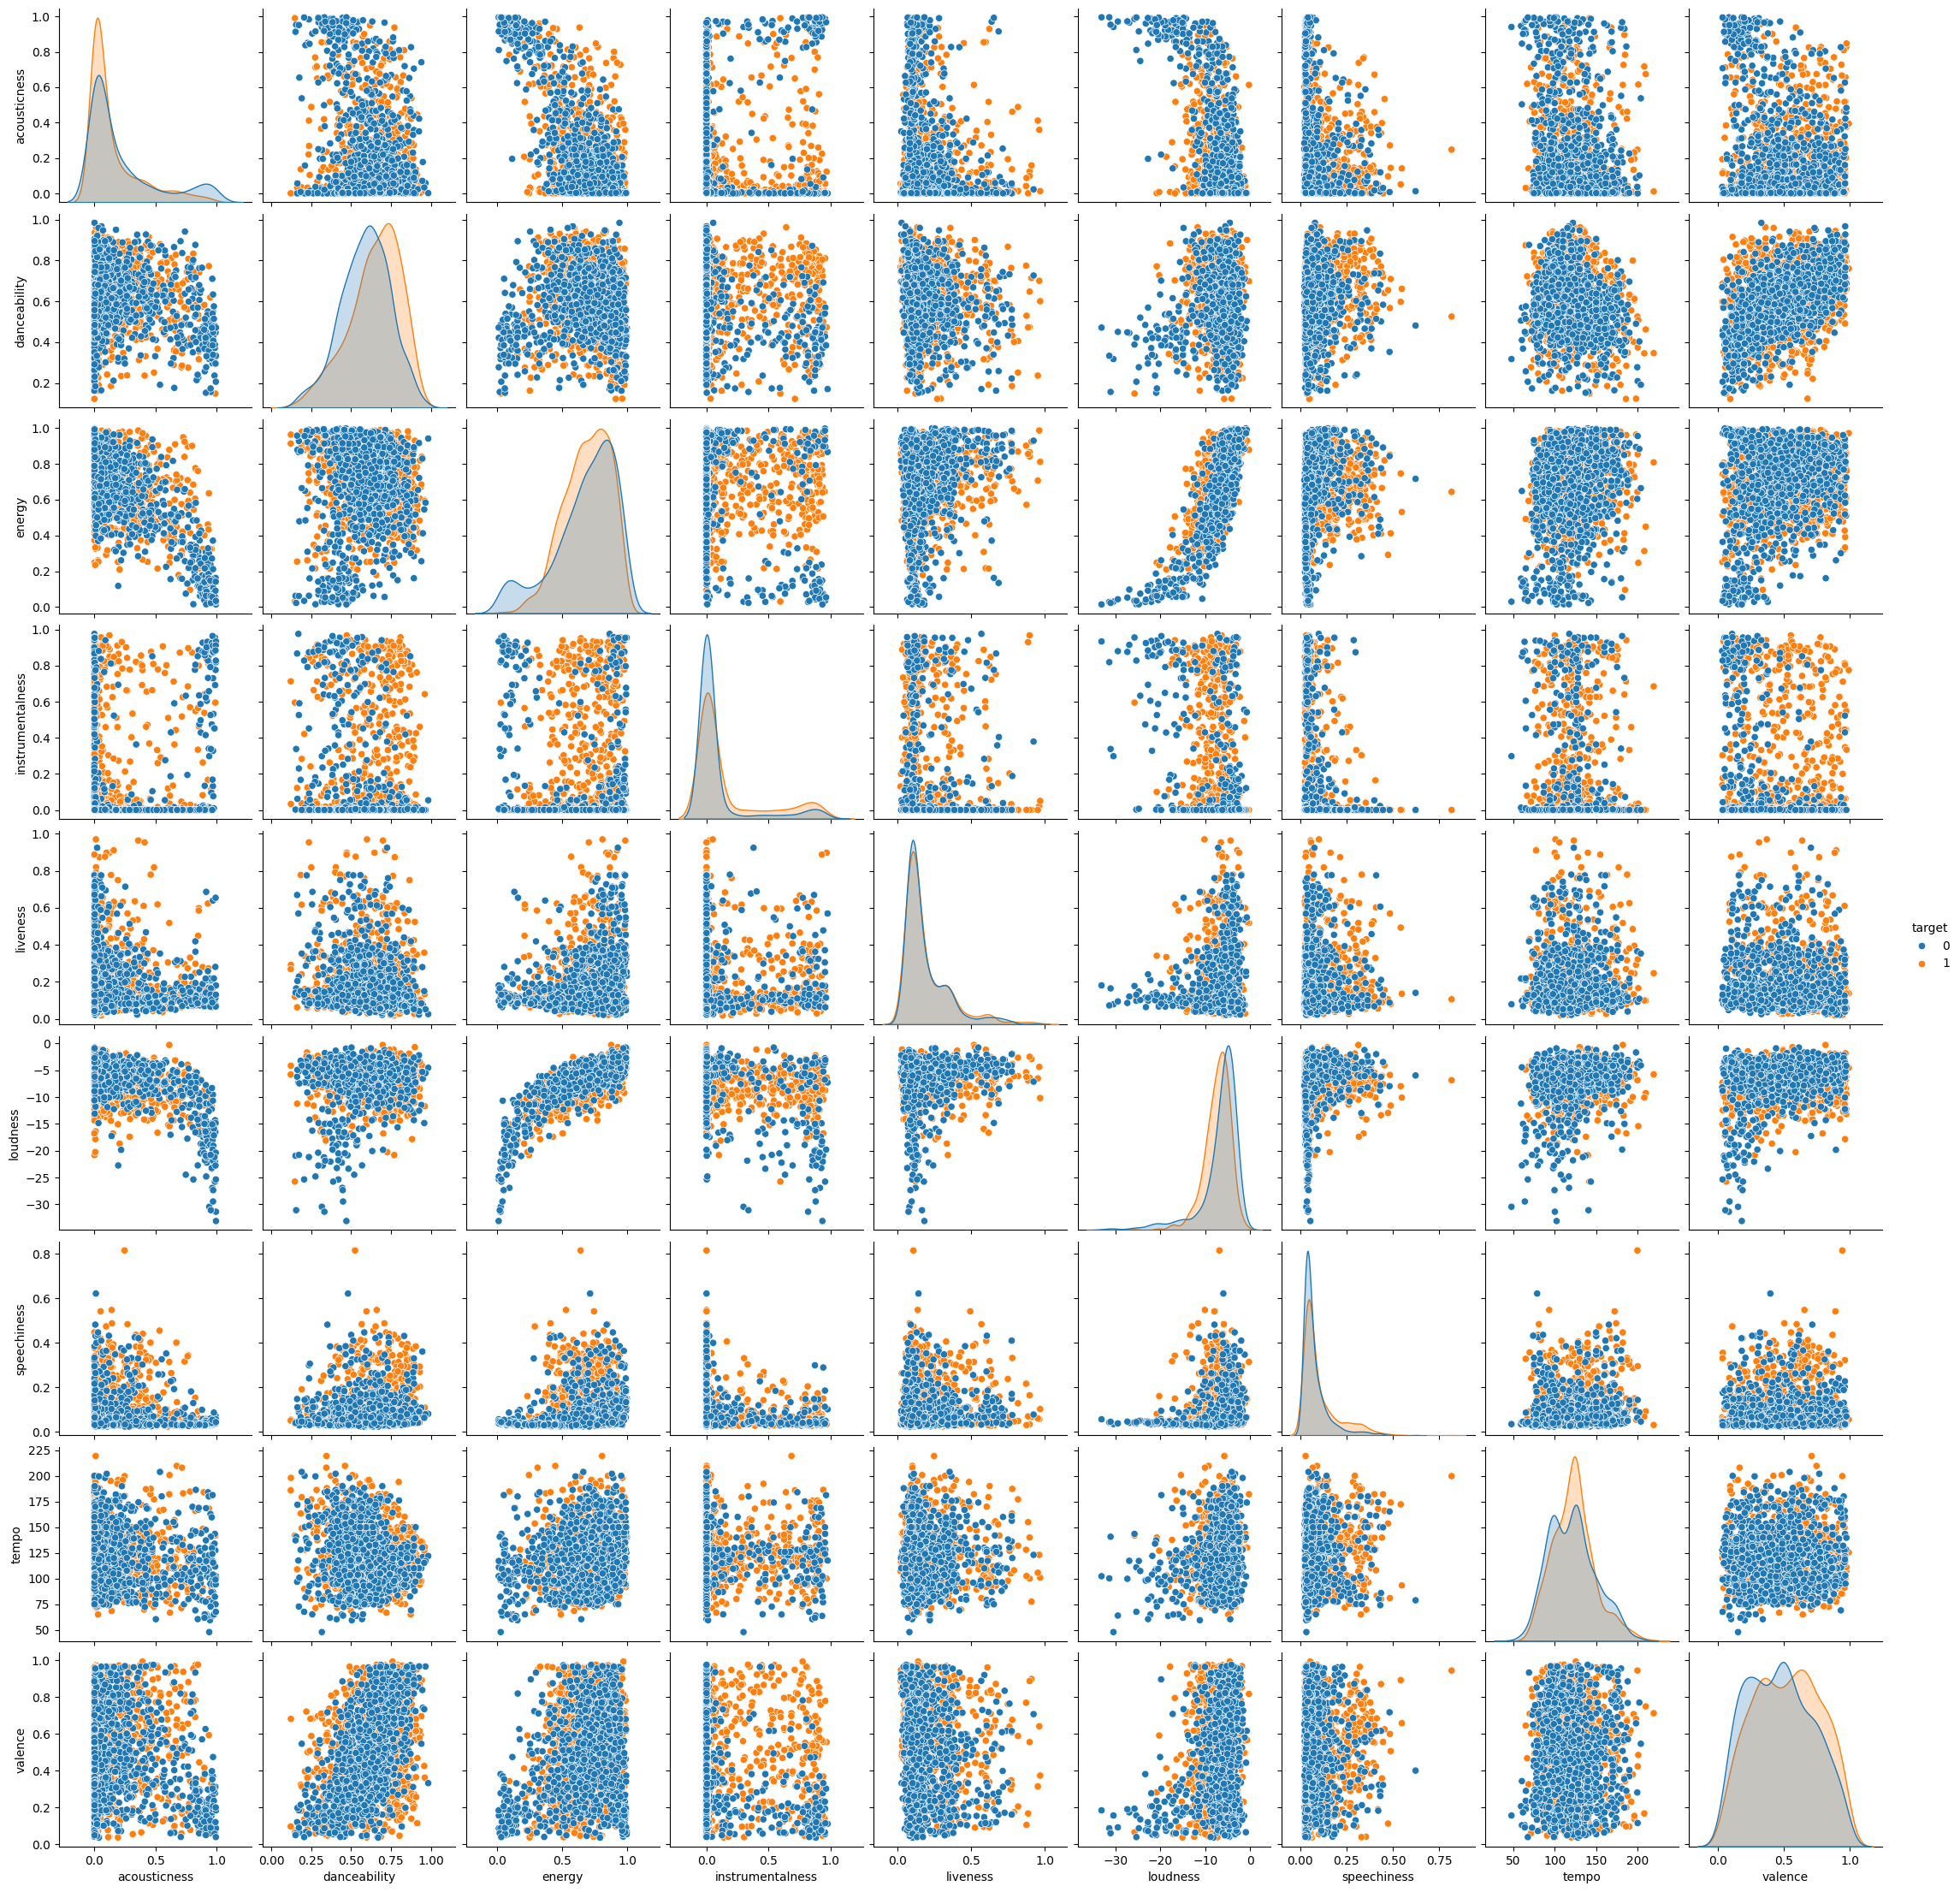

In [21]:
sns.pairplot(dfil, hue="target")

En este bloque el código filtra el DataFrame dfil para seleccionar solo las filas donde la columna "target" tenga el valor 1 y crea un nuevo DataFrame llamado dataframe_gusta con esas filas, para tener una mejor visualizacion de las canciones que si gustan.

In [8]:
mask=dfil["target"]==1
dataframe_gusta = dfil[mask]
dataframe_gusta

acousticness  danceability  energy  instrumentalness  liveness  \
0           0.0102         0.833   0.434          0.021900    0.1650   
1           0.1990         0.743   0.359          0.006110    0.1370   
2           0.0344         0.838   0.412          0.000234    0.1590   
3           0.6040         0.494   0.338          0.510000    0.0922   
4           0.1800         0.678   0.561          0.512000    0.4390   
...            ...           ...     ...               ...       ...   
1015        0.2580         0.812   0.937          0.000000    0.2390   
1016        0.0103         0.745   0.822          0.000004    0.1550   
1017        0.3290         0.673   0.922          0.000000    0.0924   
1018        0.3500         0.794   0.801          0.000000    0.0799   
1019        0.1000         0.575   0.723          0.000000    0.4830   

      loudness  speechiness  valence    tempo  target  
0       -8.795       0.4310    0.286  150.062       1  
1      -10.401       0.0794    0.588  160.083       1  
2       -7.148       0.2890    0.173   75.044       1  
3      -15.236       0.0261    0.230   86.468       1  
4      -11.648       0.0694    0.904  174.004       1  
...        ...          ...      ...      ...     ...  
1015    -1.894       0.2950    0.851  139.997       1  
1016    -6.354       0.2520    0.374   86.733       1  
1017    -5.311       0.2170    0.364  140.008       1  
1018    -6.433       0.2710    0.730  147.072       1  
1019    -4.956       0.3140    0.822  107.039       1  

[1020 rows x 10 columns]

En este bloque el código filtra el DataFrame dfil para seleccionar solo las filas donde la columna "target" tenga el valor o y crea un nuevo DataFrame llamado dataframe_nogusta con esas filas, para tener una mejor visualizacion de las canciones que no gustan

In [9]:
mask=dfil["target"]==0
dataframe_nogusta = dfil[mask]
dataframe_nogusta

acousticness  danceability  energy  instrumentalness  liveness  \
1020      0.819000         0.640   0.196          0.000036    0.0978   
1021      0.067700         0.587   0.628          0.000002    0.1220   
1022      0.013000         0.631   0.716          0.000000    0.0756   
1023      0.231000         0.589   0.809          0.000000    0.0719   
1024      0.000907         0.612   0.841          0.000000    0.3700   
...            ...           ...     ...               ...       ...   
2012      0.001060         0.584   0.932          0.002690    0.1290   
2013      0.087700         0.894   0.892          0.001670    0.0528   
2014      0.008570         0.637   0.935          0.003990    0.2140   
2015      0.001640         0.557   0.992          0.677000    0.0913   
2016      0.002810         0.446   0.915          0.000039    0.2180   

      loudness  speechiness  valence    tempo  target  
1020   -11.478       0.0267    0.273  143.919       0  
1021    -5.703       0.0431    0.650   92.003       0  
1022    -5.713       0.0432    0.637   88.541       0  
1023    -5.292       0.0376    0.464   88.965       0  
1024    -3.795       0.0353    0.502  104.986       0  
...        ...          ...      ...      ...     ...  
2012    -3.501       0.3330    0.211   74.976       0  
2013    -2.663       0.1310    0.867  110.041       0  
2014    -2.467       0.1070    0.470  150.082       0  
2015    -2.735       0.1330    0.623  150.011       0  
2016    -6.221       0.1410    0.402  190.013       0  

[997 rows x 10 columns]

Paso 1: Preparación de datos

En este bloque cambiamos la estrucra de los datos la convertimos a un arreglo numpy. definimos las variables x e y

In [5]:
X = df[["acousticness","energy","instrumentalness", "speechiness",
        "valence"]].to_numpy()
y = df['target'].to_numpy()


Paso 2: División de datos en conjuntos de entrenamiento y prueba.

dividimos los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Paso 3: Modelado de Machine Learning

Paso 3.1 K-Nearest Neighbors (KNN)

En este bloque primeramente creamos una instancia del clasificador KNN

In [67]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

Luego entrenamos el modelo utilizando los datos de entrenamiento

Realizar predicciones en el conjunto de entrenamiento

In [69]:
y_pred = knn.predict(X_test)

Precisión del modelo knn: 0.6658415841584159


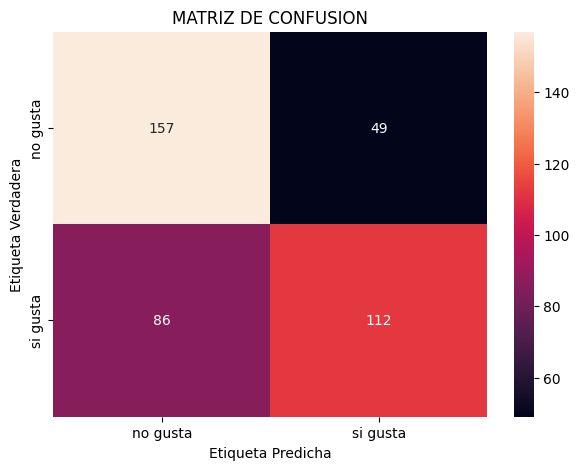

In [70]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo knn: {accuracy}')
c = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt="g", xticklabels=['no gusta', 'si gusta'], yticklabels=['no gusta', 'si gusta'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('MATRIZ DE CONFUSION')
plt.show()

Creamos una funcion dentro de la funcion tenemos:
-la varible metrics_functions donde creamos un diccionario donde la clave es el nombre de una métricas de evaluación de clasificación que esta asociada a una función metrica de presición específica
-a travez del if y else manejamos la selección flexible de diferentes métricas de evaluación en función de la métrica especificada cuando llamamos a la funcion
-con un bucle for entrenamos un clasificador KNN con diferentes valores de k y calculamos la métrica de evaluación especificada para los conjuntos de entrenamiento y prueba. Esto permite evaluar el rendimiento del clasificador KNN en función de diferentes valores de k
-creamos la figura el eje x los valores de K, en el eje y

In [59]:
def plot_knn_metrics(X, y, clf_KNN, metric='accuracy', k_range=range(1, 20), test_size=0.2, average='macro'):

    metrics_functions = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1': f1_score
    }

    if metric not in metrics_functions:
        raise ValueError(f"Métrica '{metric}' no reconocida. Elige entre: {', '.join(metrics_functions.keys())}.")

    if metric in ['precision', 'recall', 'f1']:
        metric_function = lambda y_true, y_pred: metrics_functions[metric](y_true, y_pred, average=average)
    else:
        metric_function = metrics_functions[metric]


    train_scores = []
    test_scores = []

    for k in k_range:
        knn = clf_KNN(n_neighbors=k)
        knn.fit(X_train, y_train.ravel())

        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        train_scores.append(metric_function(y_train, y_train_pred))
        test_scores.append(metric_function(y_test, y_test_pred))

    plt.figure(figsize=(6, 4))
    plt.plot(k_range, train_scores, label=f'Training {metric.capitalize()}')
    plt.plot(k_range, test_scores, label=f'Testing {metric.capitalize()}')

    plt.legend()
    plt.title(f'{metric.capitalize()} vs. Número de Vecinos')
    plt.xlabel('Número de Vecinos (k)')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()




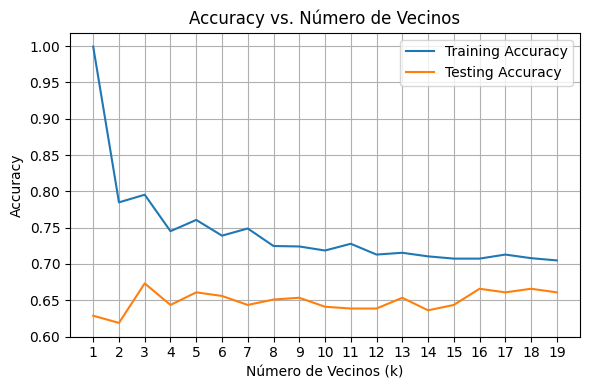

In [23]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.2)

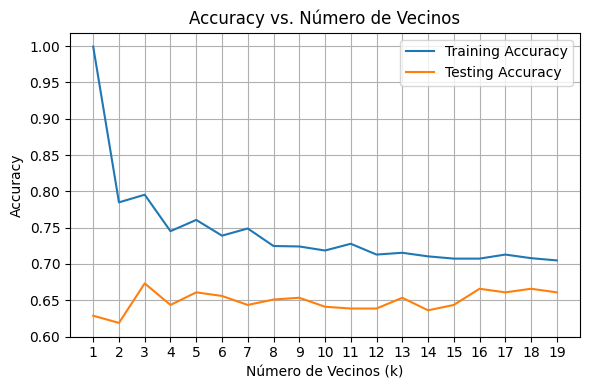

In [24]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.3)

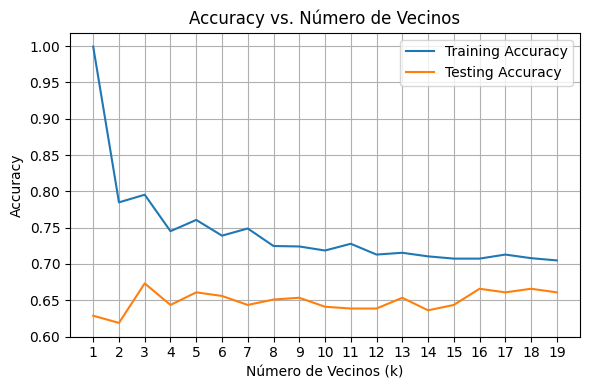

In [25]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.8)

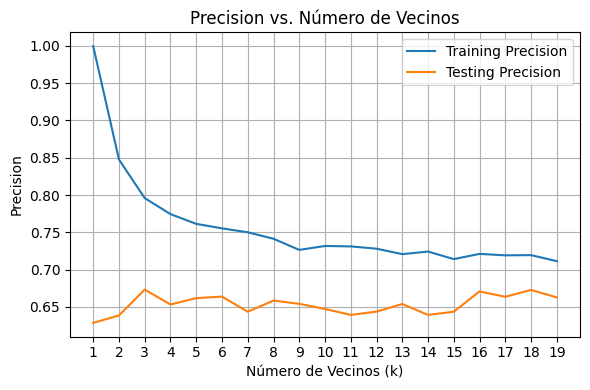

In [26]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'precision',test_size=0.2)

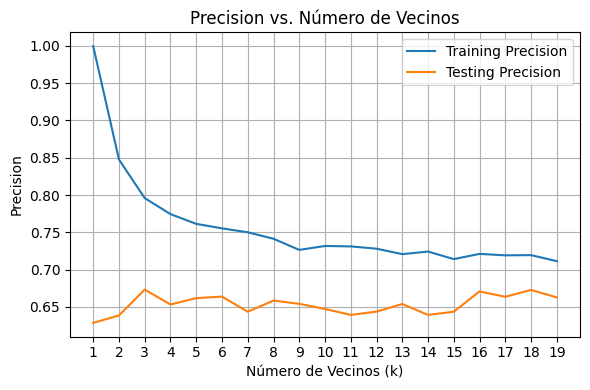

In [27]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'precision',test_size=0.3)

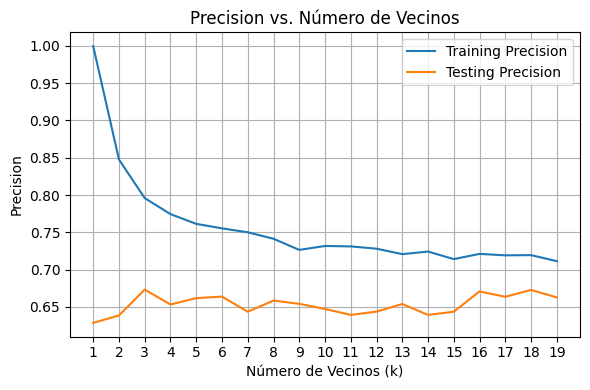

In [28]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'precision',test_size=0.8)

VALIDACION SIMPLE Y CRUZADA DEL KNN

In [60]:
knn = KNeighborsClassifier(n_neighbors=16)
scores = cross_val_score (knn, X, y, cv=9)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.69777778 0.60267857 0.58928571 0.57589286 0.64285714 0.60267857
 0.61160714 0.70535714 0.73214286]
Media de los scores: 0.6400308641975309
Desviación estándar de los scores: 0.05414167164899641


In [62]:
cv = KFold(n_splits=9, shuffle=True, random_state=50)
scores = cross_val_score (knn, X, y, cv=cv)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.70666667 0.60267857 0.66071429 0.65625    0.66517857 0.68303571
 0.68303571 0.70089286 0.62053571]
Media de los scores: 0.6643320105820105
Desviación estándar de los scores: 0.032705693173745706


AJUSTE DE LOS HIPERPARAMETROS CON RANDOM SEARCH PARA EL KNN

In [63]:
knn_model=knn
# Definir un diccionario de hiperparámetros y sus rangos
param_dist = {
    'n_neighbors': list(range(1, 30)),  # Rango de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de peso
    'p': [1, 2]
}
# Realizar Random Search
random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Entrenar el modelo con Random Search
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Evaluar el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo con los mejores hiperparámetros: {accuracy}')


Mejores hiperparámetros encontrados: {'weights': 'uniform', 'p': 1, 'n_neighbors': 15}
Precisión del modelo con los mejores hiperparámetros: 0.6707920792079208


Paso 3.2 SVM (Support Vector Machines)

In [32]:

kernels = ["linear", "rbf"]
for kernel in kernels:
    model = SVC (kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))




Accuracy using linear: 0.5866336633663366
Accuracy using rbf: 0.6881188118811881


Precisión del modelo svc: 0.6212871287128713
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.60      0.79      0.68       206
           1       0.67      0.44      0.53       198

    accuracy                           0.62       404
   macro avg       0.63      0.62      0.61       404
weighted avg       0.63      0.62      0.61       404



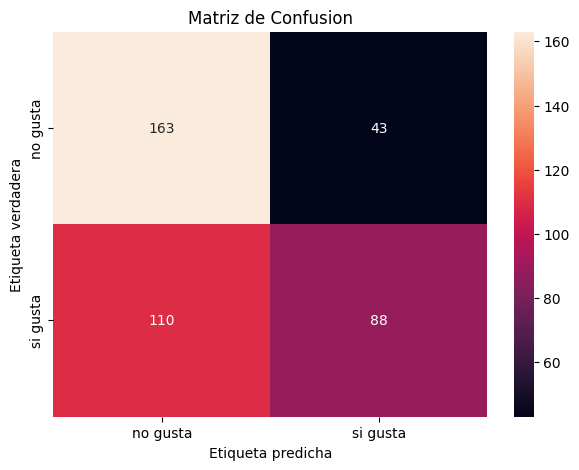

In [71]:
svc = SVC(C=1, gamma=0.1, kernel='rbf')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo svc: {accuracy}')

print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['no gusta', 'si gusta'], yticklabels=['no gusta', 'si gusta'])
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusion")
plt.show()

In [40]:
cv = KFold(n_splits=9, shuffle=True, random_state=50)
scores = cross_val_score (svc, X, y, cv=cv)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.63555556 0.59375    0.66071429 0.62053571 0.64285714 0.64285714
 0.66964286 0.70535714 0.62053571]
Media de los scores: 0.6435339506172839
Desviación estándar de los scores: 0.030550134434641392


Paso 3.3 Árbol de decisión

Precisión del modelo de Árbol de Decisiones: 0.6262376237623762
Matriz de Confusión:
[[123  83]
 [ 68 130]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       206
           1       0.61      0.66      0.63       198

    accuracy                           0.63       404
   macro avg       0.63      0.63      0.63       404
weighted avg       0.63      0.63      0.63       404



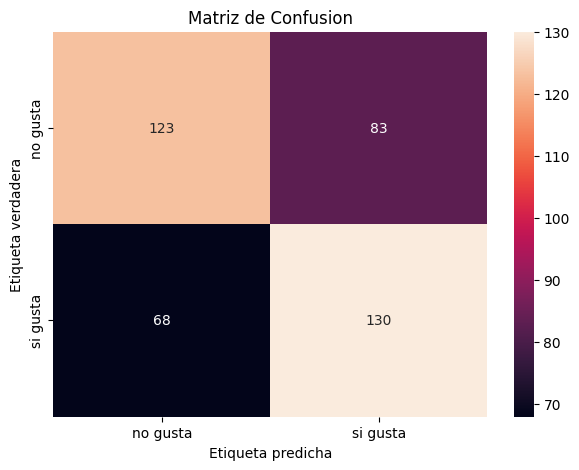

In [66]:

# Definir el modelo de Árbol de Decisiones
tree_model = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Árbol de Decisiones: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Informe de clasificación (precisión, recall, F1-score)
print(classification_report(y_test, y_pred))


plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['no gusta', 'si gusta'], yticklabels=['no gusta', 'si gusta'])
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusion")
plt.show()

In [42]:
cv = KFold(n_splits=9, shuffle=True, random_state=50)
scores = cross_val_score (tree_model, X, y, cv=cv)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.69777778 0.64285714 0.66517857 0.63392857 0.66517857 0.69196429
 0.68303571 0.69642857 0.66517857]
Media de los scores: 0.6712808641975309
Desviación estándar de los scores: 0.021641754076427253


Paso 3.4 Bayes (Naive Bayes)

Precisión del modelo de Naive Bayes: 0.599009900990099
Matriz de Confusión:
[[138  68]
 [ 94 104]]


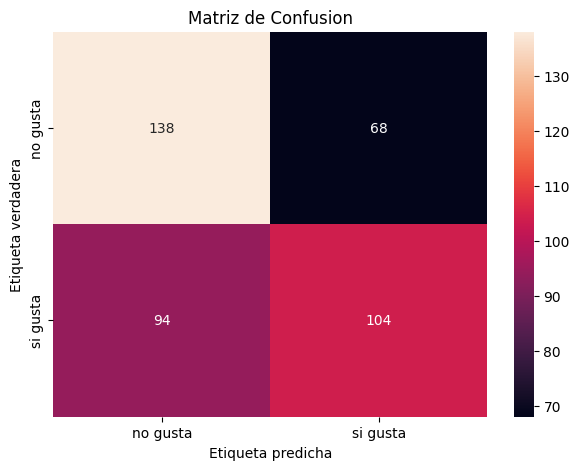

In [73]:
# Crear una instancia del clasificador Naive Bayes
clf = GaussianNB()

# Entrenar el modelo utilizando el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Precisión del modelo de Naive Bayes:", accuracy)

# Obtener la matriz de confusión
mtx_conf = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(mtx_conf)

plt.figure(figsize=(7,5))
sns.heatmap(mtx_conf, annot=True, fmt='g', xticklabels=['no gusta', 'si gusta'], yticklabels=['no gusta', 'si gusta'])
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusion")
plt.show()

In [44]:
cv = KFold(n_splits=9, shuffle=True, random_state=50)
scores = cross_val_score (clf, X, y, cv=cv)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.59111111 0.58035714 0.61607143 0.58928571 0.61607143 0.625
 0.62946429 0.63392857 0.61607143]
Media de los scores: 0.6108179012345679
Desviación estándar de los scores: 0.018091040623314018


AJUSTE DE HIPERPARAMETROS CON GRID  SEARCH

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)


Mejores parámetros: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Mejor score: 0.6977922202231057


Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       206
           1       0.73      0.62      0.67       198

    accuracy                           0.70       404
   macro avg       0.71      0.70      0.70       404
weighted avg       0.71      0.70      0.70       404



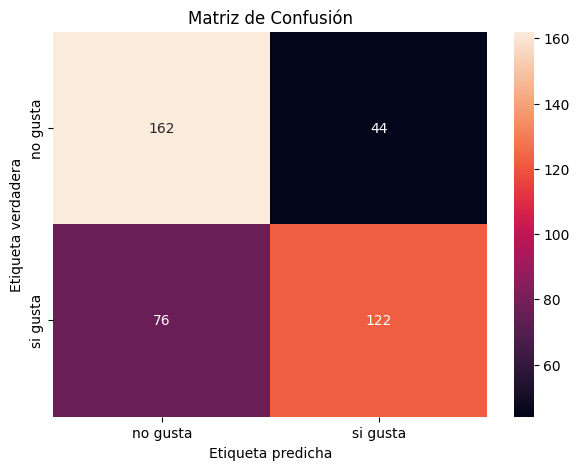

In [46]:
svc_best = SVC(C=10, gamma=10, kernel='rbf')
svc_best.fit(X_train, y_train)


y_pred = svc_best.predict(X_test)


print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


c = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['no gusta', 'si gusta'], yticklabels=['no gusta', 'si gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [47]:
# knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

svm = SVC(C=10, gamma=0.1, kernel='linear')
svm.fit(X_train, y_train)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)
naive_bayes_predictions = naive_bayes.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)

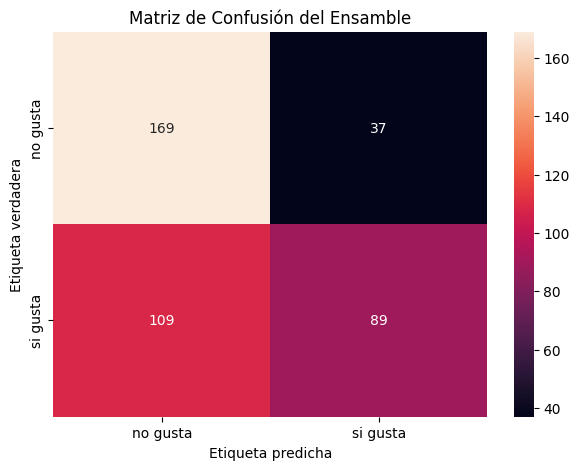

In [48]:
#ENSAMBLE
final_predictions = []
for k, s, n, dt in zip(knn_predictions, svm_predictions, naive_bayes_predictions, decision_tree_predictions):


    votes = {0: 0, 1: 0, 2: 0}
    votes[k] += 1
    votes[s] += 1
    votes[n] += 1
    votes[dt] += 1


    majority_vote = max(votes, key=votes.get)
    final_predictions.append(majority_vote)


c = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['no gusta', 'si gusta'], yticklabels=['no gusta', 'si gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()


Paso 8: CONCLUSION